# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="500"/></center>

<em>*Created with ChapGPT</em>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/climate-analytics-lab/sioc209-2024-sp/blob/main/sioc209-2024-sp/06_embedding/10_clustering.ipynb)

## Lecture 11: Unsupervised Learning and Clustering

 - [Unsupervised Learning](#Unsupervised-Learning)
 - [K-means Clustering](#K-means-Clustering)
 - [Hierarchical Clustering](#Hierarchical-Clustering)
 - [Self-Organizing Maps](#Self-Organizing-Maps)

## Unsupervised Learning

We have so far discussed supervised learning, where we have a dataset with input features and corresponding labels. The goal is to learn a mapping from the input features to the labels. But what if you don't have labels for your data?!

This is where unsupervised learning comes in. Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels. It is used to draw inferences from data sets consisting of input data without labeled responses. 

## Unsupervised Learning

There are broadly two types of unsupervised learning: clustering and dimensionality reduction. In this lecture, we will focus on clustering and we'll cover dimensionality reduction in the next lecture (and generative models the lecture after that).

<center><img src="../01_intro/_images/ML_overview.png" alt="logo" width="700"/></center>

## Clustering

Clustering is a type of unsupervised learning that groups data points together based on similarities. The goal is to create groups that are more similar to each other than they are to data points in other groups.



Clustering is used in a variety of applications, such as:

- Finding regimes / types of behavior in data
- Item clustering
- Anomaly detection
- Image segmentation


## Clustering

There are a wide variety of clustering algorithms with different strengths and weaknesses. This example from sci-kit learn shows how different clustering algorithms perform on different types of data:

<center><img src="_images/cluster_comparison.png" alt="clustering comparison" width="700"/></center>

In this lecture, we will cover two of the most common clustering algorithms: K-means and hierarchical clustering. We will also briefly discuss self-organizing maps.

## k-means Clustering

k-means clustering is one of the more popular clustering techniques in Earth Science due to its relative simplicity. The aim is to group $ N $ observations into $ k $ clusters in which each observation belongs to the cluster with the nearest center. 



The optimal distribution of the cluster centers is the distribution that minimizes the within-cluster sum of squares (i.e., the sum of the distance functions of each point to the cluster center). Mathematically, this is written as:

$\\arg \min_S = \sum_{i=1}^{k} \sum_{x \in S_i} \| x - \mu_i \|^2 $

where $ S = S_1, S_2, \ldots, S_k $ denotes the set of $ k $ clusters, $ x $ denotes the set of observations, $ \mu_i $ denotes the center of cluster $ S_i $ defined as the mean of all points in $ S_i $, and $ \arg \min $ specifies that we are looking for the minimum over varying options of $ S $.


## k-means Clustering

While the idea behind k-means is straightforward, actually computing the most optimal solution is computationally expensive, especially for large datasets. Most implementations of k-means use a heuristic approach to find a local minimum of the within-cluster sum of squares.


Thus, in practice, one typically runs the k-means clustering algorithm many times (with each instance starting with a unique initial guess) and takes the iteration that produces the smallest minimum within-cluster sum of squares (i.e., the equation above). This also allows one to assess the stability of the clustering results.

## k-means Clustering

The standard algorithm for k-means clustering is Lloyd’s algorithm, which begins with an initial guess of the cluster centers $ \mu_i $ and then iteratively refines this guess until it converges. 

The following figure shows an example of this iterative process.

<center><img src="_images/lloyds_algorithm.png" alt="Lloyd's algorithm" width="700"/></center>

This section, and the above example image is modified from Libby Barnes' course notes on clustering: https://benmoseley.blog/my-research/so-what-is-a-physics-informed-neural-network/. 

### Example application to Old Faithful eruptions

Let's apply k-means clustering to the Old Faithful dataset. The dataset contains the duration of the Old Faithful geyser eruptions and the waiting time until the next eruption. We will use the `KMeans` class from `sklearn.cluster` to perform the clustering.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

df = pd.read_csv("_data/old_faithful_eruptions.csv", index_col=0)
df

,duration,delay
index,,
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90


### Example application to Old Faithful eruptions


<Axes: xlabel='duration', ylabel='delay'>

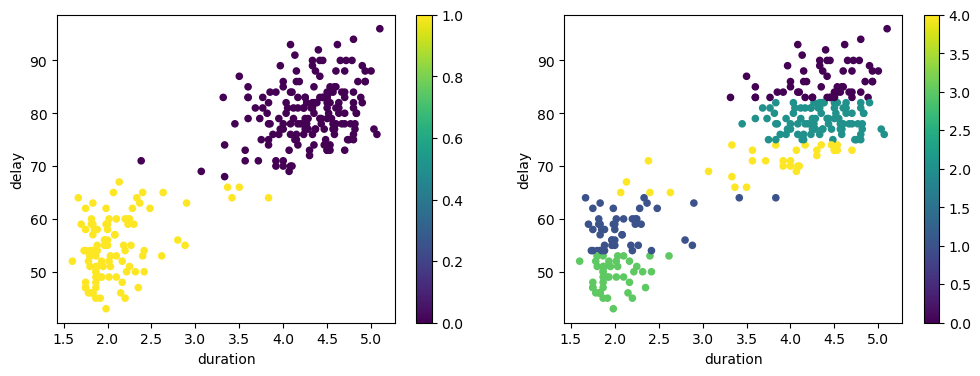

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df.plot.scatter(x='duration', y='delay',  cmap='viridis', ax=axs[0],
                c=KMeans(n_clusters=2, random_state=42).fit_predict(df))
df.plot.scatter(x='duration', y='delay', cmap='viridis', ax=axs[1],
                c=KMeans(n_clusters=5, random_state=42).fit_predict(df))

## k-means Summary

k-means clustering is a simple and popular clustering algorithm that groups data points into $ k $ clusters based on their similarity. The algorithm aims to minimize the within-cluster sum of squares.

To apply k-means clustering, two decisions must be made:

1. How many clusters do you want? 

> This is a decision that must be made by the user and is not determined by the clustering algorithm. One will obtain different results based on the choice of $ k $ as seen in the figure above. Quantities such as the gap statistic, the elbow method, and the silhouette score can be used to help determine the optimal number of clusters.

See e.g. https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation for more information.

## k-means Summary


2. How should you seed your initial guess? 
>There are many options available for how to best make your initial guess at the cluster centers. The k-means++ algorithm is a popular method for seeding the initial guess. It is a variation of Lloyd’s algorithm that chooses the initial cluster centers in a way that is more likely to lead to a better final solution. 

## Heirarchical Clustering

Hierarchical clustering is another popular clustering technique that does not require the user to specify the number of clusters. 

The algorithm works by grouping data points into a tree of clusters. The tree is called a dendrogram and is created by iteratively merging the two closest clusters until all data points are in one cluster. The user can then choose how many clusters they want by cutting the dendrogram at the desired level.

## Heirarchical Clustering

There are two types of hierarchical clustering: agglomerative and divisive. 

 - Agglomerative clustering is the more popular of the two and works by starting with each data point as its own cluster and then iteratively merging the two closest clusters until all data points are in one cluster. 
 - Divisive clustering works in the opposite way by starting with all data points in one cluster and then iteratively splitting the cluster until each data point is in its own cluster.


## Heirarchical Clustering

Note, that unlike k-means clustering we cannot assign new data points to clusters after the clustering is complete. This is because the clustering is based on the structure of the dendrogram and not on the cluster centers. 

Put another way: There is no notion of a cluster center in hierarchical clustering so we can only assign new data points to clusters by re-running the clustering algorithm with the new data points included.

Let's look at an example of hierarchical clustering applied to a synthetic dataset with three clusters.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=10, centers=3, cluster_std=0.60)

We will use the `scipy` library to perform hierarchical clustering. The `linkage` function computes the hierarchical clustering of the input data and returns a linkage matrix that encodes the hierarchical clustering. 

We specify the method as `ward` to use the Ward variance minimization algorithm. This algorithm minimizes the sum of squared differences within all clusters.

In [1]:
# Compute the linkage matrix
Z = linkage(X, 'ward')

NameError: name 'linkage' is not defined

The `dendrogram` function then plots the dendrogram of the hierarchical clustering. The y-axis represents the distance between clusters. The height of the dendrogram at each merge represents the distance between the two clusters that are merged.

The `colors_threshold` argument allows us to specify the distance at which we want to cut the dendrogram to obtain different clusters. The dendrogram will then color the clusters accordingly. We take those colors and use them to plot the data points with the corresponding cluster colors.

Text(0.5, 1.0, 'Final Clusters (matched colors)')

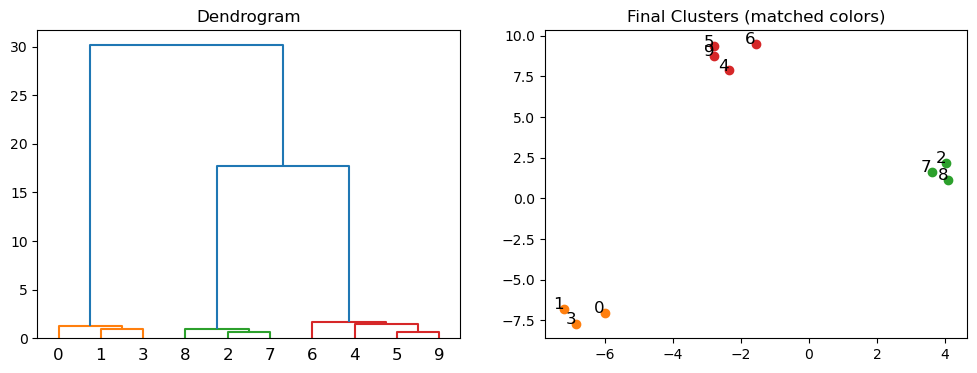

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the dendrogram and get the color list
dendro = dendrogram(Z, color_threshold=2, ax=ax1)
ax1.set_title('Dendrogram')

# Extract the color list from the dendrogram
color_list = [x for _, x in sorted(zip(dendro['leaves'], dendro['leaves_color_list']))]

# Plot the final clustering with matching colors
for i, (x, y) in enumerate(X):
    ax2.scatter(x, y, color=color_list[i])
    ax2.text(x, y, str(i), fontsize=12, ha='right')

ax2.set_title('Final Clusters (matched colors)')


Agglomerative clustering is useful when your data is not well separated into distinct clusters. It is also useful when you want to see the relationships between clusters. However, it is computationally expensive and can be slow for large datasets.

##  Self-Organizing Maps (SOM)

Self-Organizing Maps (SOM), introduced by Teuvo Kohonen in the 1980s, are a type of artificial neural network trained using unsupervised learning 
to produce a low-dimensional (typically two-dimensional) representation of the input space, known as a map.
SOMs are particularly useful for visualizing high-dimensional data and clustering similar data points together.


A SOM consists of a grid of nodes (neurons), each of which is associated with a weight vector of the same dimension as the input data. 
The training process involves iteratively updating the weights to preserve the topological properties of the input space.


##  Self-Organizing Maps (SOM)

Given some intial weight vectors $ w_j $, the SOM algorithm proceeds as follows:
   - Find the best matching unit (BMU) $ c $, which is the node with the smallest distance to $ x $: $      c = \arg\min_j \| x - w_j \|      $
   
   - Update the weight vectors of the BMU and its neighbors to move them closer to $ x $:
      -    $      w_j(t+1) = w_j(t) + \eta(t) \cdot h_{c,j}(t) \cdot (x - w_j(t)) $
      -   where $ \eta(t) $ is the learning rate and $ h_{c,j}(t) $ is the neighborhood function, which decreases with time and distance from the BMU.


This visualizations shows the updating of the weights in a SOM:

<center><img src="_images/train_som.gif" alt="SOM" width="300"/></center>

This makes it clear that what the SOM is learning is the topology of the input space - the mapping from the high-dimensional input space to the low-dimensional map space. 


The SOM algorithm is a form of competitive learning, where nodes compete to represent the input data. The winning node (BMU) and its neighbors are updated to better represent the input data.

Let's look at an example of applying a SOM to a synthetic dataset with three clusters:

In [6]:
# We need the minisom package for this example
# !pip install minisom

In [7]:
import numpy as np
from minisom import MiniSom
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with underlying clusters
n_samples = 300
n_features = 3
n_clusters = 4
data, true_labels = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)


We initialize the SOM with a grid of nodes and random weights:

In [8]:

# Initialize and train the SOM
som_size = (5, 5)  # 10x10 grid
som = MiniSom(som_size[0], som_size[1], n_features, sigma=0.2, learning_rate=0.5)
som.random_weights_init(data)

Then, we train the SOM by iterating over the input data and updating the weights of the BMU and its neighbors:

In [9]:
som.train_random(data, 1000)  # 500 iterations

Now that the SOM is trained, we can cluster the weights of the nodes to identify similar regions in the input space:

In [10]:
# Extract the weights of the SOM neurons
weights = som.get_weights().reshape(-1, n_features)

# Apply k-means clustering to the SOM neurons
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(weights)
labels = kmeans.labels_.reshape(som_size[0], som_size[1])

Let's visualize the SOM and the clustered weights:

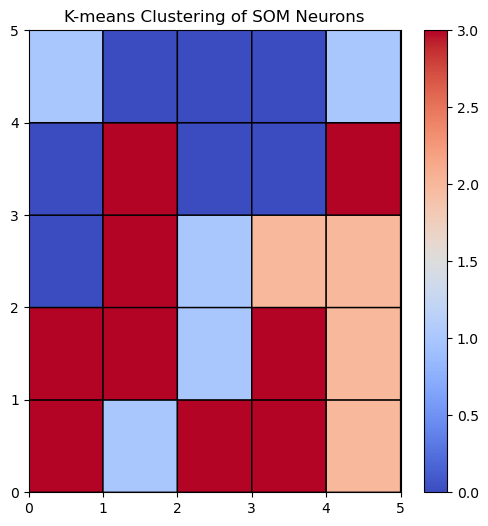

In [11]:
# Visualize the SOM with the k-means clusters
plt.figure(figsize=(6, 6))
plt.pcolor(labels, cmap='coolwarm', edgecolors='k', linewidths=1)
plt.colorbar()
plt.title("K-means Clustering of SOM Neurons")
plt.show()

Then we can assign each input data point to the cluster corresponding to the nearest node. The nearest node is determined by the Euclidean distance between the input data point and the weight vector of the node and is sometimes called the 'winning' node:

In [12]:
# Predict the cluster for each data point
data_clusters = np.zeros(n_samples, dtype=int)
for i, x in enumerate(data):
    bmu = som.winner(x)
    data_clusters[i] = labels[bmu]

And plot the data points with the corresponding cluster colors:

Text(0, 0.5, 'Feature 2')

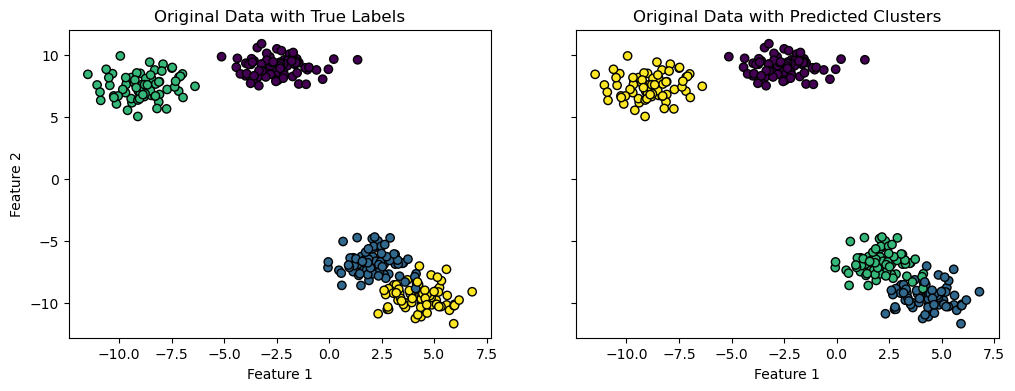

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)

ax1.scatter(data[:, 0], data[:, 1], c=true_labels, cmap='viridis', edgecolor='k')
ax1.set_title("Original Data with True Labels")

ax2.scatter(data[:, 0], data[:, 1], c=data_clusters, cmap='viridis', edgecolor='k')
ax2.set_title("Original Data with Predicted Clusters")
ax1.set_xlabel("Feature 1")
ax2.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")


## SOM Summary

Hopefully, this gives you a sense of how SOMs can be used for clustering and visualization of high-dimensional data. They are particularly useful for identifying patterns and relationships in complex datasets.

In the next lecture, we will cover dimensionality reduction techniques, such as t-SNE and VAEs, which can be used in conjunction with clustering algorithms to visualize high-dimensional data.